In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df =pd.read_csv('listings.csv')
!pip install geojson
import geojson
#data = json.loads("neighbourhoods.geojson")
with open("neighbourhoods.geojson") as f:
    gj = geojson.load(f)

In [39]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,48107269,Residences at the Domain,368944610,Kia,NaN,78758,30.40051,-97.72527,Entire home/apt,185,31,0,NaN,NaN,40,304
10268,48107277,Residences at the Domain,368944610,Kia,NaN,78758,30.40051,-97.72527,Entire home/apt,153,31,0,NaN,NaN,40,331
10269,48109299,Relax in comfort | 1BR in Austin,359036978,Kia,NaN,78729,30.45118,-97.77480,Entire home/apt,82,30,0,NaN,NaN,358,360
10270,48109324,A place of your own | 1BR in Austin,359036978,Kia,NaN,78701,30.26519,-97.74229,Entire home/apt,153,30,0,NaN,NaN,358,324


In [40]:
from shapely.geometry import shape, GeometryCollection, Point

In [41]:
point=Point(-97.71379,30.27577)

In [42]:
with open("neighbourhoods.geojson") as f:
    gj = geojson.load(f)

In [43]:
print(gj)

{"features": [{"geometry": {"coordinates": [[[[-97.890016, 30.209412], [-97.889286, 30.208708], [-97.888672, 30.207904], [-97.88822, 30.207299], [-97.88752, 30.206345], [-97.886872, 30.205469], [-97.886517, 30.205022], [-97.886029, 30.204487], [-97.88542, 30.203912], [-97.884924, 30.203498], [-97.884474, 30.203157], [-97.884007, 30.202848], [-97.883473, 30.202527], [-97.88299, 30.202254], [-97.882506, 30.202013], [-97.881903, 30.201707], [-97.881386, 30.201494], [-97.880723, 30.201256], [-97.879919, 30.200993], [-97.879385, 30.200851], [-97.878781, 30.200713], [-97.878058, 30.200553], [-97.877606, 30.200478], [-97.876957, 30.200411], [-97.876312, 30.200365], [-97.87568, 30.200342], [-97.875091, 30.200326], [-97.874472, 30.200349], [-97.873762, 30.200394], [-97.873041, 30.200473], [-97.872354, 30.200575], [-97.871806, 30.200691], [-97.871298, 30.200814], [-97.870575, 30.200965], [-97.870402, 30.201], [-97.870068, 30.201057], [-97.869675, 30.20111], [-97.869287, 30.201144], [-97.868994, 

In [44]:
for feature in gj['features']:

    polygon = shape(feature['geometry'])

    if polygon.contains(point):
        print ('Found containing polygon:', feature)

Found containing polygon: {"geometry": {"coordinates": [[[[-97.691861, 30.248477], [-97.69172, 30.248105], [-97.691586, 30.247159], [-97.691413, 30.246025], [-97.691331, 30.245575], [-97.691869, 30.24543], [-97.692286, 30.245238], [-97.692431, 30.245169], [-97.69251, 30.24494], [-97.692671, 30.244756], [-97.693155, 30.244672], [-97.693737, 30.244638], [-97.694269, 30.24464], [-97.694554, 30.244701], [-97.694742, 30.244777], [-97.694988, 30.244859], [-97.695462, 30.245017], [-97.695589, 30.245116], [-97.695648, 30.245274], [-97.695604, 30.245696], [-97.695577, 30.24602], [-97.695656, 30.246151], [-97.695898, 30.246382], [-97.696016, 30.246508], [-97.696247, 30.246714], [-97.696514, 30.246843], [-97.696644, 30.246763], [-97.696876, 30.246594], [-97.696984, 30.246467], [-97.69718, 30.246249], [-97.697511, 30.245843], [-97.697888, 30.245606], [-97.69807, 30.245618], [-97.698326, 30.245673], [-97.698582, 30.245766], [-97.698802, 30.245867], [-97.699006, 30.245995], [-97.699248, 30.246209], 

In [45]:
#Part(a): neighbourhoods with highest number of listings
n3 = df.groupby(["neighbourhood"]).agg({"id":'count'}).reset_index() #totalno. of listings in each neighbourhood
n3.sort_values('id',ascending=False,inplace=True)

    neighbourhood    id
3           78704  1822
1           78702  1263
0           78701   713
27          78741   622
2           78703   530
30          78745   513
4           78705   505
36          78751   478
10          78723   313
42          78758   298


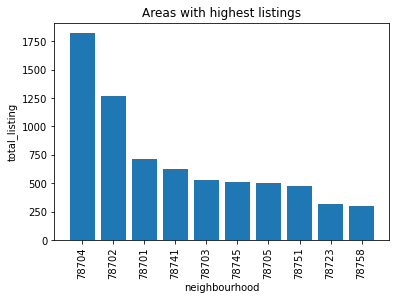

In [46]:
n5=n3.head(10) #selecting  10 areas with max listing
print(n5)
x=n5["neighbourhood"].values #graph for top 10 neighbourhoods and their total number of listings
y=n5["id"].values
plt.bar(range(len(x)), y)
plt.xlabel('neighbourhood')
plt.ylabel('total_listing')
plt.title("Areas with highest listings")
plt.xticks(range(len(n5)), x, rotation='vertical')
plt.show()

In [47]:
!pip install descartes

In [48]:
from descartes import PolygonPatch

In [28]:
#Part(b): Thematic map of neighbourhood broken down by room type
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [29]:
t2 = df.groupby(['neighbourhood','room_type']).agg({'id':'count'}).reset_index()

d = {}
for i in gj['features']:
    d[int(i['properties']['neighbourhood'])] = i['geometry']

ndf = pd.DataFrame(d.items())
ndf.columns = ['neighbourhood','polygon']
t2['neighbourhood'] = t2['neighbourhood'].astype(int)

t2 = pd.merge(t2,ndf,on='neighbourhood')

t2['norm_val'] = t2['id']/t2.groupby(['room_type'])['id'].transform(lambda x : x.max())
t2['norm_val'] = t2['norm_val']/1.25 + 0.2


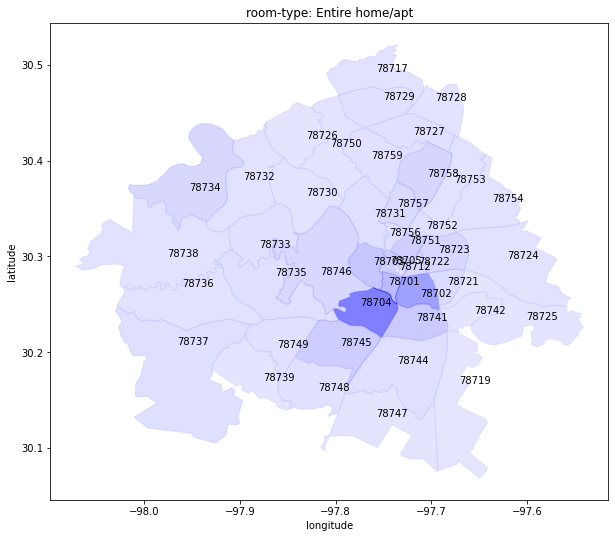

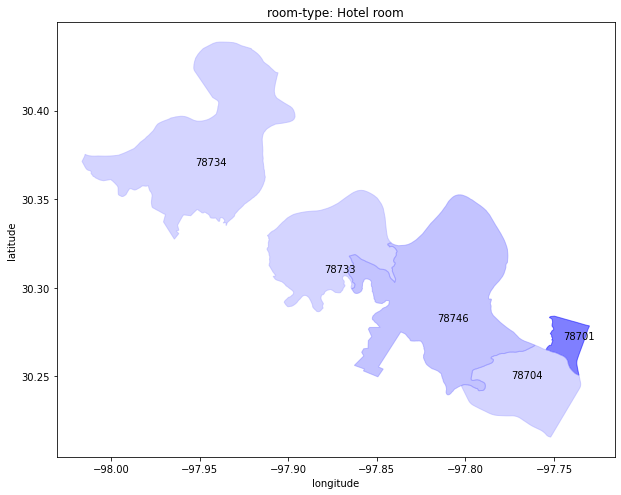

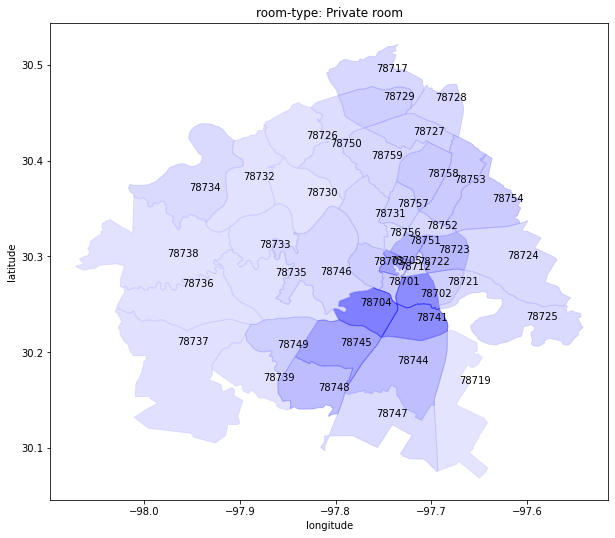

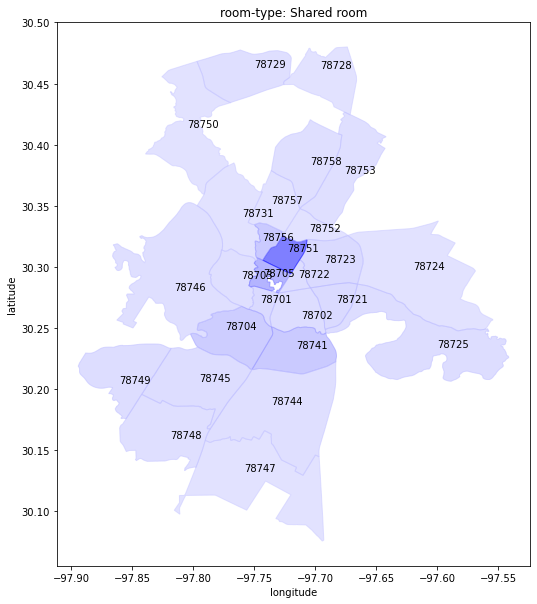

In [30]:
c = 0

for j in t2.room_type.unique():
    fig = plt.figure(figsize = (10,10))
    t3 = t2[t2['room_type'] == j]
    for i in t3.values:
        ax = fig.gca()
        poly = i[3]
        ax.add_patch(PolygonPatch(poly, fc= lighten_color('b', i[4]), ec=lighten_color('b', i[4]), alpha=0.5, zorder=2,label = i[0]))
        ax.axis('scaled')
        centerx = np.mean(poly['coordinates'][0][0],axis=0)[0]
        centery = np.mean(poly['coordinates'][0][0],axis=0)[1]
        plt.text(centerx, centery,i[0])
    plt.title('room-type: '+str(j))
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    c += 1
    plt.savefig(str(c)+'.png')
    plt.show()

In [14]:
#Part(c): Top 10 hosts in Austin
n2 = df.groupby(["host_id"]).agg({"id":'count'}).reset_index() #number of properties per host
n2.sort_values('id',ascending=False,inplace=True) 

In [15]:
n4=n2.head(10) #selecting top 10

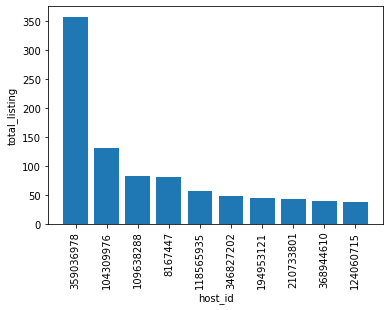

In [16]:
#graph for top 10 hosts and their total number of listings
x=n4["host_id"].values
y=n4["id"].values
plt.bar(range(len(x)), y)
plt.xlabel('host_id')
plt.ylabel('total_listing')
plt.title("Highest listed hosts")
plt.xticks(range(len(n4)), x, rotation='vertical')
plt.show()

In [19]:
#Total accomodation in Austin of each type
m1=df.groupby(["room_type"]).agg({"id":'count'}).reset_index()
m1.sort_values('id',ascending=True,inplace=True)
m1

,room_type,id
1,Hotel room,11
3,Shared room,133
2,Private room,2166
0,Entire home/apt,7962


In [24]:
#no. of rooms of each type in all neighbourhoods
r1 = df.groupby(["neighbourhood", "room_type"]).agg({"id":'count'}).reset_index()
r1

,neighbourhood,room_type,id
0,78701,Entire home/apt,644
1,78701,Hotel room,6
2,78701,Private room,59
3,78701,Shared room,4
4,78702,Entire home/apt,1065
...,...,...,...
114,78758,Entire home/apt,238
115,78758,Private room,58
116,78758,Shared room,2
117,78759,Entire home/apt,58


In [33]:
#Average prices in each neighbourhood
p1=df.groupby(["neighbourhood"]).agg(mean_price=('price',np.mean),count=('id',"count")).reset_index()
p1.sort_values('mean_price',ascending=True,inplace=True)

#Top 10 cheapest neighbourhoods
p2=p1.head(10) 
p2

,neighbourhood,mean_price,count
17,78730,1061.837838,37
20,78733,1051.074627,67
19,78732,780.702128,47
31,78746,648.019531,256
24,78737,474.237113,97
25,78738,435.795455,44
2,78703,413.058491,530
26,78739,398.320000,25
35,78750,392.829268,41
21,78734,358.158590,227


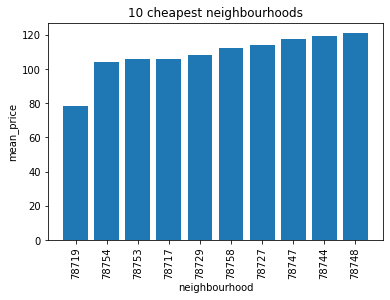

In [21]:
x=p2["neighbourhood"].values
y=p2["mean_price"].values
plt.bar(range(len(x)), y)
plt.xlabel('neighbourhood')
plt.ylabel('mean_price')
plt.title("10 cheapest neighbourhoods")
plt.xticks(range(len(p2)), x, rotation='vertical')
plt.show()

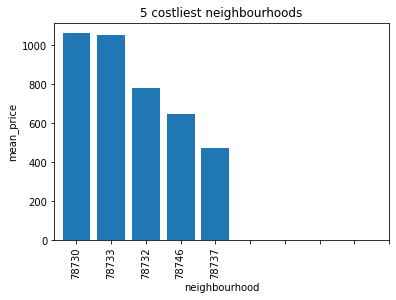

In [37]:
# Top 5 costliest neighbourhoods
p1.sort_values('mean_price',ascending=False,inplace=True)
p3=p1.head(5)

x=p3["neighbourhood"].values
y=p3["mean_price"].values
plt.bar(range(len(x)), y)
plt.xlabel('neighbourhood')
plt.ylabel('mean_price')
plt.title("5 costliest neighbourhoods")
plt.xticks(range(len(p2)), x, rotation='vertical')
plt.show()


In [22]:
#Avalability of accomodation in each neighbourhood
q1=df.groupby(["neighbourhood"]).agg({'availability_365':'count'}).reset_index()
q1.sort_values('availability_365',ascending=False,inplace=True)

#10 neighbourhoods with maximum accomodation available
q2=q1.head(10)
q2

,neighbourhood,availability_365
3,78704,1822
1,78702,1263
0,78701,713
27,78741,622
2,78703,530
30,78745,513
4,78705,505
36,78751,478
10,78723,313
42,78758,298


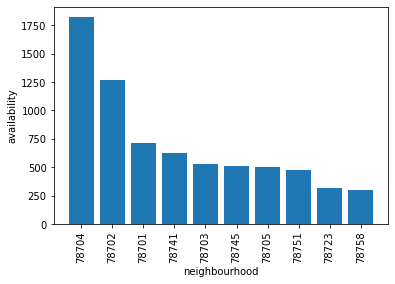

In [23]:
x=q2["neighbourhood"].values
y=q2["availability_365"].values
plt.bar(range(len(x)), y)
plt.xlabel('neighbourhood')
plt.ylabel('availability')
plt.xticks(range(len(q2)), x, rotation='vertical')
plt.show()